# Memory Cards

## 1. Importing Libraries

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import skewnorm
from sklearn.linear_model import LinearRegression

## 2. Data loading functions

In [66]:
def load_penguins_data():
    return sns.load_dataset("penguins")

def load_flights_data():
    return sns.load_dataset("flights")

def load_titanic_data():
    return sns.load_dataset("titanic")["age"].dropna()

## 3. Plotting utility function

##### setup_plot()
This function creates a new square plot that's 5 inches by 5 inches and adjusts the plot area to fill the entire space. By doing this, it removes any extra borders or margins around the plot, giving more room to display the data. This is especially helpful when saving the plot as an image(eg: plt.savefig) since it minimizes empty space and keeps the focus on the actual data being shown.

In [69]:
def setup_plot():
    plt.figure(figsize=(5, 5)) # (width, height)
    plt.axes((0.0, 0.0, 1.0, 1.0)) # (x,y,width,height)

## 4. Plotting functions

### a. Categorical Plots

In [72]:
def plot_pie_chart():
    setup_plot()
    s = pd.Series([12, 6, 4, 2], index=list("    "))
    s.plot.pie(explode=[0, 0, 0, 0.2]) # Explode parameter controls how far each slice of the pie chart is "pulled out" from the center.
    plt.savefig("piechart.png")

def plot_bar_chart(penguins):
    setup_plot()
    penguins.groupby("species")["sex"].count().plot.bar()
    plt.xticks([]), plt.yticks([])  # Remove x-axis and y-axis labels for a cleaner look
    plt.xlabel(" ")
    plt.savefig("barchart.png")

def plot_boxplot(penguins):
    setup_plot()
    sns.boxplot(data=penguins, y="flipper_length_mm", hue="species", gap=0.1, showfliers=False, linewidth=3, legend=False)
    plt.xticks([]), plt.yticks([])
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.savefig("boxplot.png")

### b. Numerical Plots

In [74]:
def plot_time_series(flights):
    setup_plot()
    flights["passengers"][36:68].plot(linewidth=7) # Plot a thick line for the passenger data from index 36 to 67
    plt.xticks([]), plt.yticks([])
    plt.savefig("timeseries.png")

def plot_scatter(penguins):
    setup_plot()
    sample = penguins.sample(100)
    sns.scatterplot(data=sample, x="bill_length_mm", y="bill_depth_mm", hue="species", s=300, legend=False)
    plt.xticks([]), plt.yticks([])
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.savefig("scatter.png")

def plot_histogram(titanic_data):
    setup_plot()
    sns.histplot(data=titanic_data, bins=12) # Data has been divide into 12 intervals or ranges
    plt.xticks([]), plt.yticks([])
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.savefig("histo.png")

def plot_outlier(penguins):
    setup_plot()
    p = penguins.iloc[-125:].copy()
    p.loc[219, "body_mass_g"] = 4400
    p.loc[219, "bill_depth_mm"] = 16.5
    sns.scatterplot(data=p, x="body_mass_g", y="bill_depth_mm", hue="species", s=400, legend=False)
    plt.xticks([]), plt.yticks([])
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.savefig("outlier.png")

def plot_heatmap(penguins):
    setup_plot()
    num = penguins.iloc[:, 2:].copy().dropna()
    num["sex"] = (num["sex"] == "Male").astype(int)
    cm = num.corr().abs()
    sns.heatmap(cm, cbar=False, cmap="viridis")
    plt.xticks([]), plt.yticks([])
    plt.savefig("heatmap.png")

def plot_sample_scatter(penguins):
    setup_plot()
    p = penguins.iloc[:100].copy()
    p["sample"] = "a"
    sample = p.sample(10)
    p.loc[sample.index.values, "sample"] = "b"
    p.sort_values(by="sample", inplace=True)
    sns.scatterplot(data=p, x="body_mass_g", y="bill_depth_mm", hue="sample", s=400, legend=False)
    plt.xticks([]), plt.yticks([])
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.savefig("sample.png")

def plot_logistic_regression():
    n = 5.0
    x = np.linspace(-n, n, 1000, np.float32)
    y = 1 / (1 + np.exp(-x))
    x = list(x) + [n, -n]
    y = list(y) + [0.0, 0.0]

    setup_plot()
    plt.plot(x, y, "k")
    plt.fill(x, y, "g")
    plt.plot([0.0], [0.5], "ko", markersize=10)
    plt.plot([-n, n], [1.0, 1.0], "k-")
    plt.axis([-n, n, 0.0, 1.0])
    plt.xticks([]), plt.yticks([])
    plt.savefig("logreg.png")

### 5. Main Function to call all plot functions

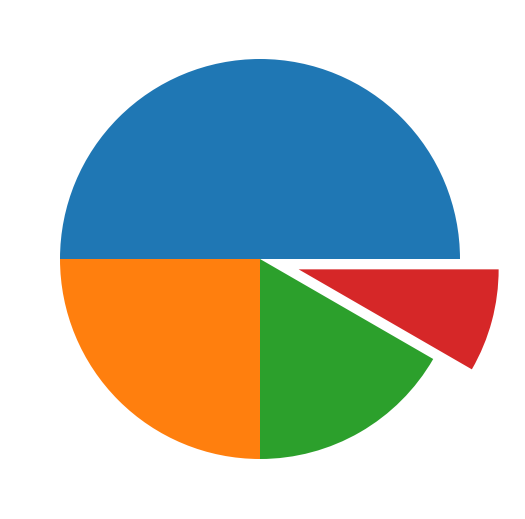

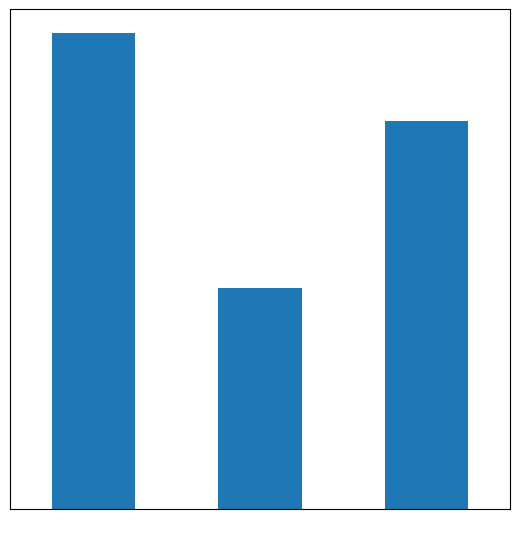

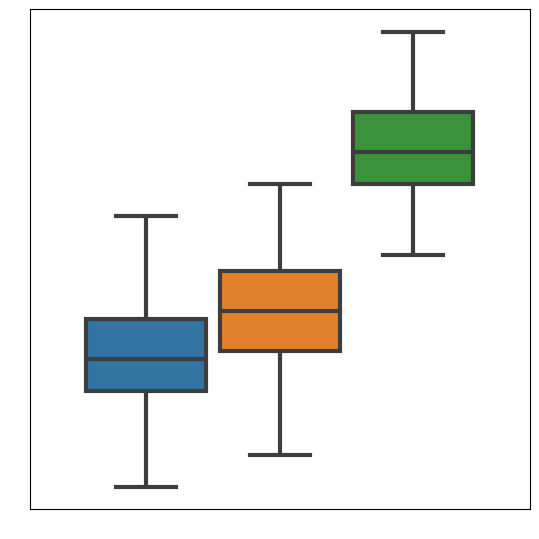

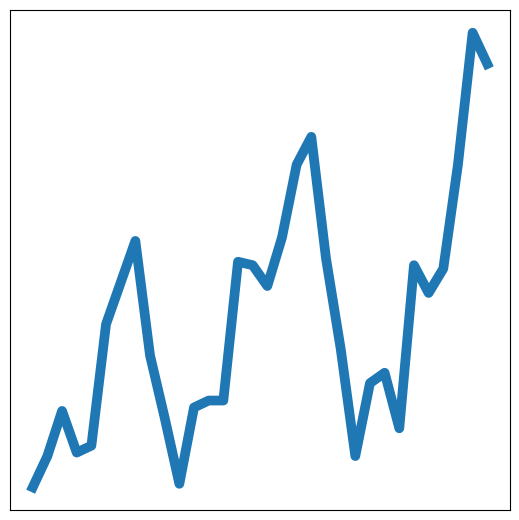

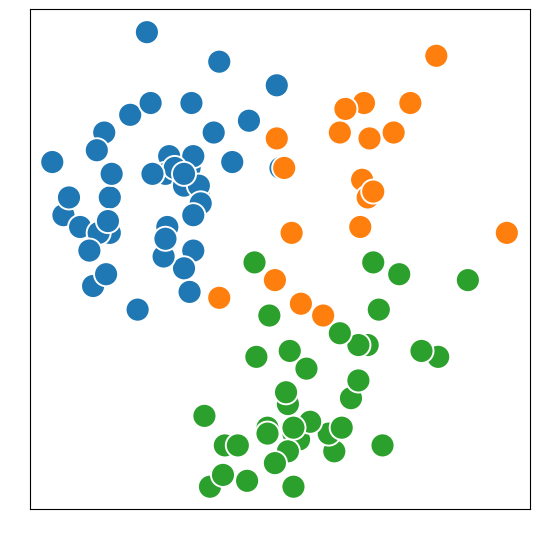

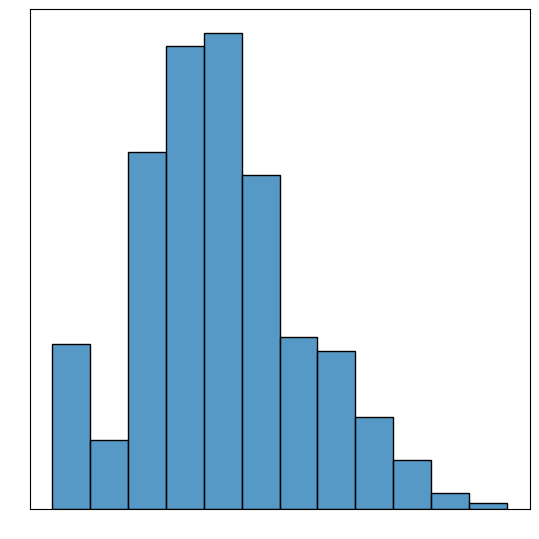

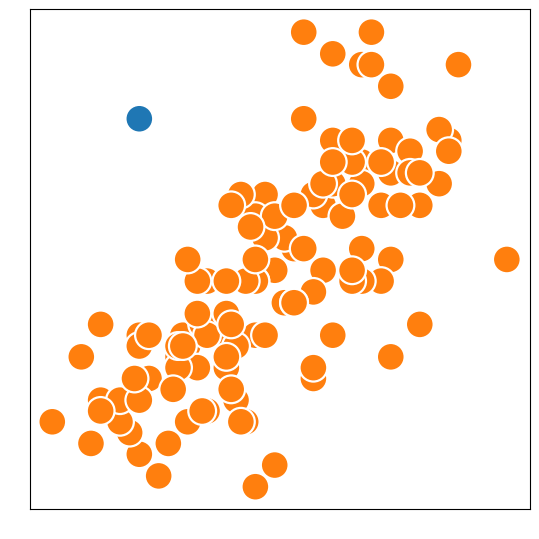

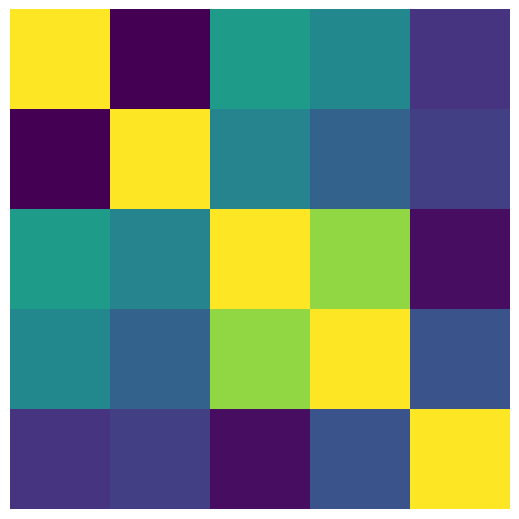

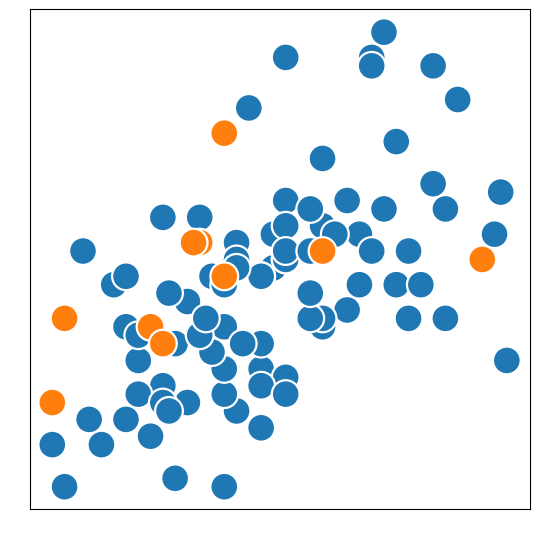

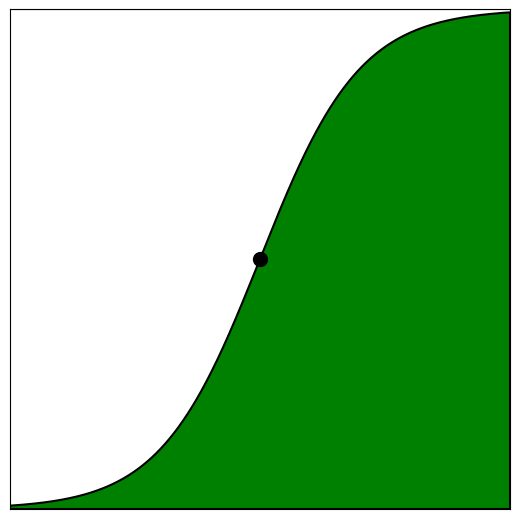

In [76]:
def main():
    penguins = load_penguins_data()
    flights = load_flights_data()
    titanic_data = load_titanic_data()

    plot_pie_chart()
    plot_bar_chart(penguins)
    plot_boxplot(penguins)
    plot_time_series(flights)
    plot_scatter(penguins)
    plot_histogram(titanic_data)
    plot_outlier(penguins)
    plot_heatmap(penguins)
    plot_sample_scatter(penguins)
    plot_logistic_regression()
    
if __name__ == "__main__":
    main()